In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
# pass in column names for each CSV
u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users = pd.read_csv('data/users.dat', sep='::',names=u_cols)

/Users/aribahmehreen/.virtualenvs/keras_tf/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [18]:
users.head()

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [23]:
len(users)

6039

In [30]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ratings.dat', sep='::',names=r_cols)

/Users/aribahmehreen/.virtualenvs/keras_tf/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [20]:
ratings.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [24]:
len(ratings)

1000208

In [31]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'type']
movies = pd.read_csv('data/movies.dat', sep='::',names=m_cols)

/Users/aribahmehreen/.virtualenvs/keras_tf/lib/python2.7/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [32]:
len(movies)

3883

In [33]:
movies.head()

,movie_id,title,type
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
movie_ratings = pd.merge(movies, ratings)

In [35]:
len(movie_ratings)

1000209

In [36]:
movie_ratings.head()

,movie_id,title,type,user_id,rating,unix_timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [38]:
lens = pd.merge(movie_ratings, users)


In [40]:
lens.head()

,movie_id,title,type,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [41]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]

In [42]:
most_rated

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [43]:
lens.title.value_counts()[:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [44]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                                size      mean
title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [45]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                           size mean
title                               
Ulysses (Ulisse) (1954)       1  5.0
Lured (1947)                  1  5.0
Follow the Bitch (1998)       1  5.0
Bittersweet Motel (2000)      1  5.0
Song of Freedom (1936)        1  5.0

In [46]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Paths of Glory (1957)                                 230  4.473913
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941

In [47]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})


In [49]:
movie_stats.head()

rating          
                                size      mean
title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [60]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]


In [61]:
most_50

movie_id
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
356     2194
2716    2181
296     2171
1240    2098
1       2077
1214    2024
2916    1996
457     1995
3578    1924
1200    1820
541     1800
2987    1799
1259    1785
50      1783
34      1751
2791    1731
780     1730
3175    1728
1193    1725
919     1718
924     1716
1127    1715
2355    1703
1387    1697
1221    1692
dtype: int64

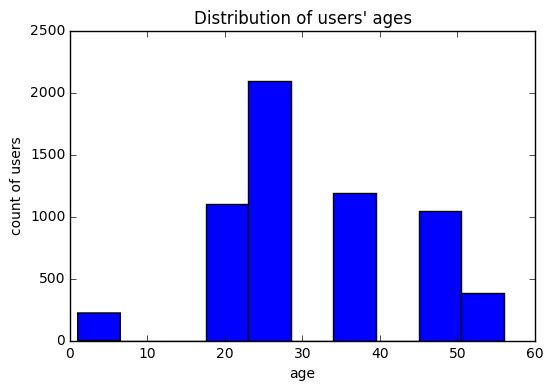

In [65]:
users.age.plot.hist()
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [66]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,1,0-9
53,50,50-59
124,25,20-29
369,35,30-39
770,18,10-19
2778,45,40-49
5001,56,50-59


In [67]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
             size      mean
age_group                  
0-9         27211  3.549520
10-19      183536  3.507573
20-29      395556  3.545235
30-39      199003  3.618162
40-49       83633  3.638062
50-59      111270  3.732677
60-69           0       NaN
70-79           0       NaN

In [68]:
lens.set_index('movie_id', inplace=True)

In [69]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                         age_group
2001: A Space Odyssey (1968)  0-9          4.150000
                              10-19        3.923404
                              20-29        4.024712
                              30-39        4.080940
                              40-49        4.168478
                              50-59        4.198502
Abyss, The (1989)             0-9          3.909091
                              10-19        3.893939
                              20-29        3.614509
                              30-39        3.686217
                              40-49        3.683099
                              50-59        3.512048
Airplane! (1980)              0-9          3.794872
                              10-19        4.076667
                              20-29        4.002821
Name: rating, dtype: float64

In [70]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59
title,,,,,,
Braveheart (1995),4.192982,4.406250,4.254292,4.152318,4.119048,4.055363
"Bug's Life, A (1998)",3.587500,3.820163,3.954338,3.843931,3.707965,3.771429
E.T. the Extra-Terrestrial (1982),3.653333,3.801527,3.957111,4.004202,4.085427,4.183333
Fargo (1996),4.283019,4.175166,4.235650,4.234694,4.315789,4.413249
Forrest Gump (1994),4.168539,4.100897,4.054678,4.036939,4.187166,4.144444
"Fugitive, The (1993)",4.163265,4.017766,4.119904,4.136000,4.121429,4.113300
Galaxy Quest (1999),3.739130,3.656357,3.764253,3.830380,3.760736,3.888199
Ghostbusters (1984),3.881356,4.020179,3.894490,3.838407,3.966292,3.802752
Gladiator (2000),4.203390,4.231441,4.084291,3.981651,4.132231,4.056818


In [71]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59
title,,,,,,
Braveheart (1995),4.192982,4.406250,4.254292,4.152318,4.119048,4.055363
"Bug's Life, A (1998)",3.587500,3.820163,3.954338,3.843931,3.707965,3.771429
E.T. the Extra-Terrestrial (1982),3.653333,3.801527,3.957111,4.004202,4.085427,4.183333
Fargo (1996),4.283019,4.175166,4.235650,4.234694,4.315789,4.413249
Forrest Gump (1994),4.168539,4.100897,4.054678,4.036939,4.187166,4.144444
"Fugitive, The (1993)",4.163265,4.017766,4.119904,4.136000,4.121429,4.113300
Galaxy Quest (1999),3.739130,3.656357,3.764253,3.830380,3.760736,3.888199
Ghostbusters (1984),3.881356,4.020179,3.894490,3.838407,3.966292,3.802752
Gladiator (2000),4.203390,4.231441,4.084291,3.981651,4.132231,4.056818


In [72]:
lens.reset_index('movie_id', inplace=True)

In [73]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)

In [74]:
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


In [75]:
pivoted['diff'] = pivoted.M - pivoted.F

In [76]:
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665


In [77]:
pivoted.reset_index('movie_id', inplace=True)

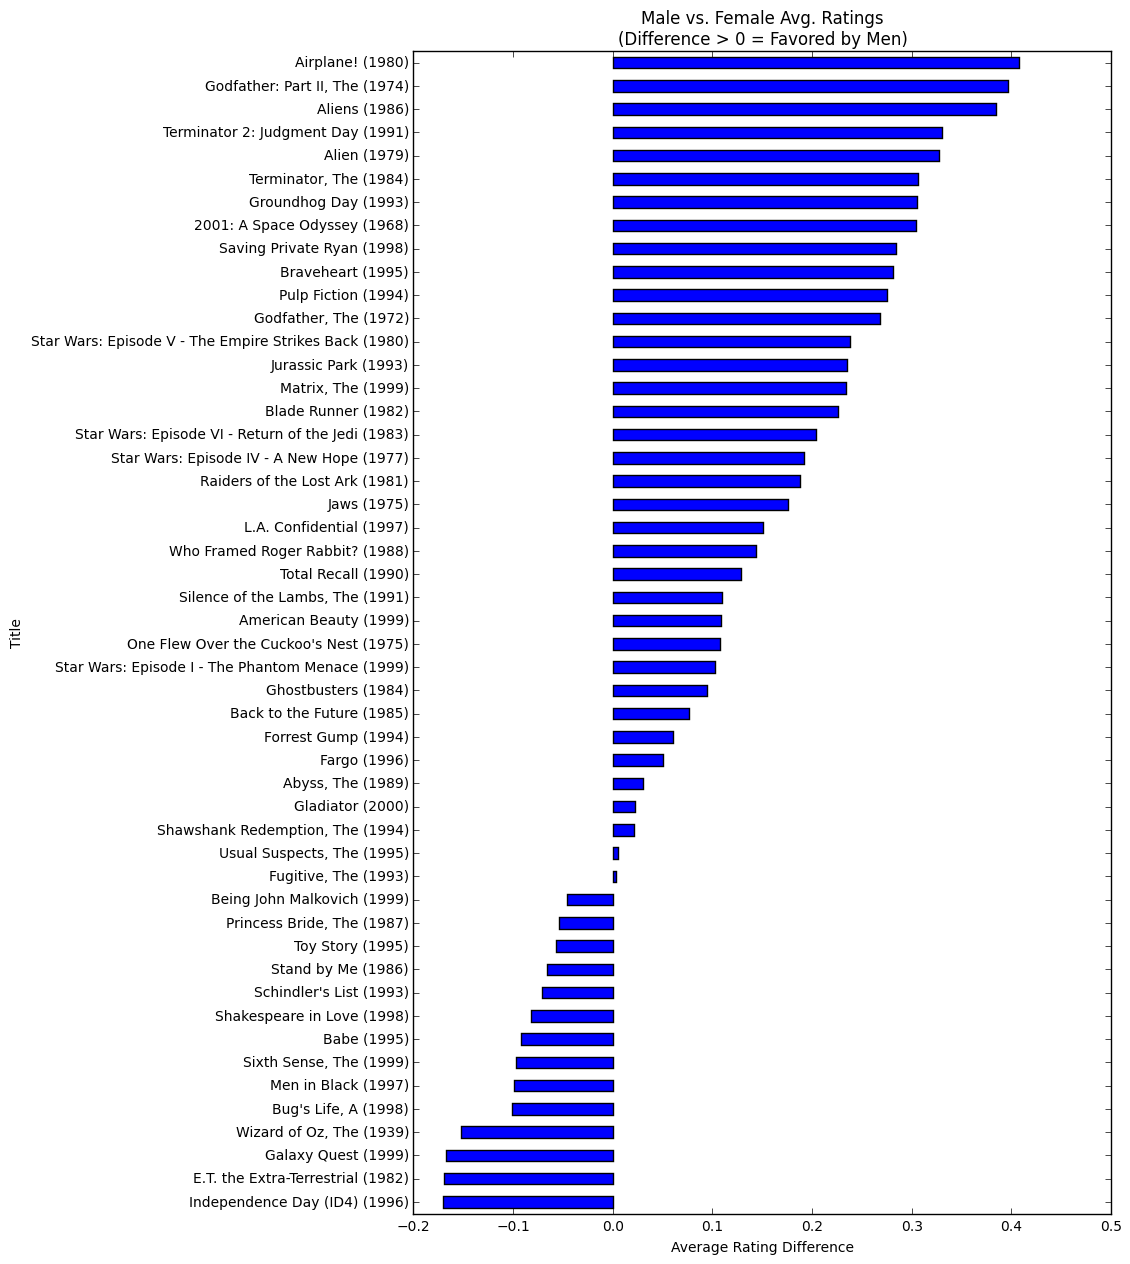

In [78]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')